## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env import TicTacToe ##- import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

env=TicTacToe()

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [5]:
# printing the default tic tac toe board positions
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [6]:
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state , time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    z=np.random.random()
    
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
        
    else:
        possible_action = [i for i in env.action_space(state)[0]]
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)

Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [9]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(7,5)),('x-x-x-x-x-x-x-x-x',(2,9)),
                       ('x-3-x-x-1-x-x-x-x',(6,5)),('x-5-x-x-x-x-5-7-x',(6,2))]    #select some sample Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []  

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

#### Define hyperparameters  ---write your code here

In [12]:
## Lets set the hyperparameters for training

EPISODES = 2000000
LR = 0.001    #Learning Rate
GAMMA = 0.9   # DIscount Factor
max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.0001       # epsilon decay rate
threshold = 3000     # every these many episodes,  Q-values will be stored/appended (convergence graphs
policy_threshold = 10000 ##every these many episodes, the Q-dict will be updated

In [13]:
initialise_tracking_states()

### Q-update loop ---write your code here

In [14]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() #calling the environment
    curr_state = env.state
    done = False
    add_to_dict(curr_state)
    
    
    while done!= True:
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state,episode) ## applying epsilon greedy method
        next_state, reward, done = env.step(curr_state, curr_action) ## getting rewards
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)
    
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))- Q_dict[curr_state1][curr_action] ) 
        else:
             Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))
        
        ## next state
        curr_state = next_state
            
    if((episode+1)%threshold)   == 0:
        save_tracking_states()
        save_obj(States_track,'States_tracked')
        print(episode) ### Printing the episodes so that we know the progress
        
        
    if((episode+1)%policy_threshold) == 0:
        save_obj(Q_dict,'Policy')    
        
        
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

2999
5999
8999
11999
14999
17999
20999
23999
26999
29999
32999
35999
38999
41999
44999
47999
50999
53999
56999
59999
62999
65999
68999
71999
74999
77999
80999
83999
86999
89999
92999
95999
98999
101999
104999
107999
110999
113999
116999
119999
122999
125999
128999
131999
134999
137999
140999
143999
146999
149999
152999
155999
158999
161999
164999
167999
170999
173999
176999
179999
182999
185999
188999
191999
194999
197999
200999
203999
206999
209999
212999
215999
218999
221999
224999
227999
230999
233999
236999
239999
242999
245999
248999
251999
254999
257999
260999
263999
266999
269999
272999
275999
278999
281999
284999
287999
290999
293999
296999
299999
302999
305999
308999
311999
314999
317999
320999
323999
326999
329999
332999
335999
338999
341999
344999
347999
350999
353999
356999
359999
362999
365999
368999
371999
374999
377999
380999
383999
386999
389999
392999
395999
398999
401999
404999
407999
410999
413999
416999
419999
422999
425999
428999
431999
434999
437999
440999
443999


In [15]:
elapsed_time

2497.3582508563995

#### Check the Q-dictionary

In [16]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0533404552906789,
              (0, 3): -1.053353711533668,
              (0, 5): -1.0533441611932974,
              (0, 7): -1.0533407025477717,
              (0, 9): -1.0533451278302388,
              (1, 1): -1.0533400471252634,
              (1, 3): -1.0533494090971294,
              (1, 5): -1.0533468055398507,
              (1, 7): -1.0533415263692874,
              (1, 9): -1.053350520480684,
              (2, 1): -1.05335023660767,
              (2, 3): -1.0533496534414049,
              (2, 5): -1.0533426465765738,
              (2, 7): -1.0533494875256826,
              (2, 9): -1.0533431703012712,
              (3, 1): -1.0533398770285953,
              (3, 3): -1.0533484938115676,
              (3, 5): -1.0533409354190115,
              (3, 7): -1.0533424305444041,
              (3, 9): -1.053346004864278,
              (4, 1): -1.0533445381620523,
              (4, 3): -1.053344481214224,
              (4, 5):

In [17]:
len(Q_dict)

2071214

#### Check the states tracked for Q-values convergence
(non-evaluative)

<function matplotlib.pyplot.show(*args, **kw)>

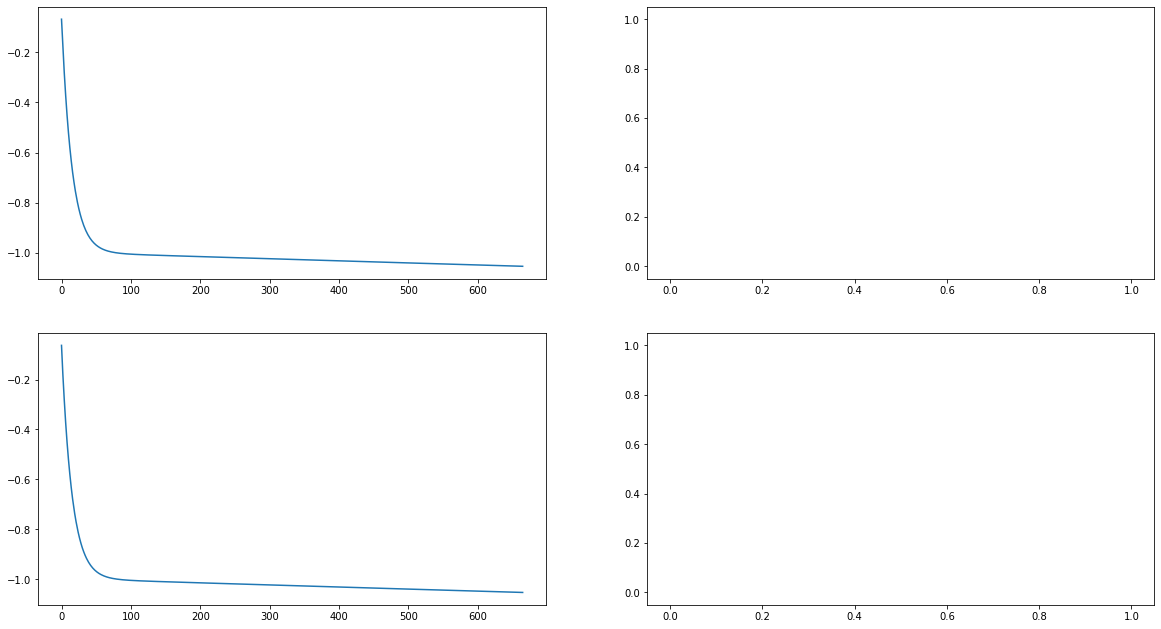

In [18]:
# Write the code for plotting the graphs for state-action pairs tracked
plt.figure(0, figsize=(20,11))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(7,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(7,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-1-x-x-x-x'][(6,5)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-1-x-x-x-x'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-5-x-x-x-x-5-7-x'][(6,2)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-5-x-x-x-x-5-7-x'][(6,2)]))
plt.show

### Epsilon - decay check

In [21]:
time = np.arange(0,2000000)
epsilon = []
for i in range(0,2000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

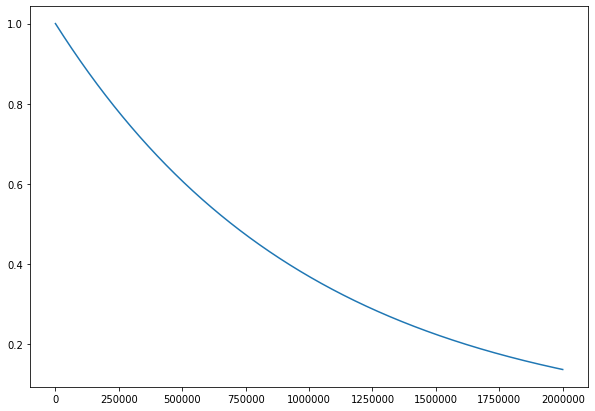

In [22]:
plt.figure(0, figsize=(10,7))
plt.plot(time, epsilon)
plt.show()